NAMA : ZAHWA GENOVEVA

EMAIL : zahwagenoveva09@gmail.com

<center>
    <img src="https://webtoons-static.pstatic.net/image/pc/home/og_id.jpg?dt=2021111201" width="10500" height="590"/>
</center>

**ANALISIS SENTIMEN**

In [1]:
# Install library yang diperlukan
!pip install scikit-learn nltk matplotlib seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import nltk
from nltk.corpus import stopwords
import re

In [2]:
# Download stopwords
nltk.download('stopwords')

# Load dataset
file_path = '/content/komentar_seimbang.csv'
df = pd.read_csv(file_path)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Preprocessing: Membersihkan teks dari tanda baca, angka, dan karakter khusus
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hanya menyisakan huruf
    text = text.lower()  # Ubah menjadi huruf kecil
    text = text.split()  # Pisah kata-kata
    text = [word for word in text if word not in stopwords.words('indonesian')]  # Hilangkan stopwords
    return ' '.join(text)

df['content'] = df['content'].apply(clean_text)

In [4]:
# Pelabelan data: 1 untuk positif (rating >= 4), 0 untuk negatif (rating <= 2)
df['label'] = df['score'].apply(lambda x: 1 if x >= 4 else 0)

In [5]:
# Ekstraksi fitur menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['content']).toarray()
y = df['label']


In [6]:
# Membagi data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Model SVM
model = SVC(C=1, kernel='linear', gamma='scale')  # Hyperparameter dari GridSearchCV
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [8]:
# Evaluasi model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.86


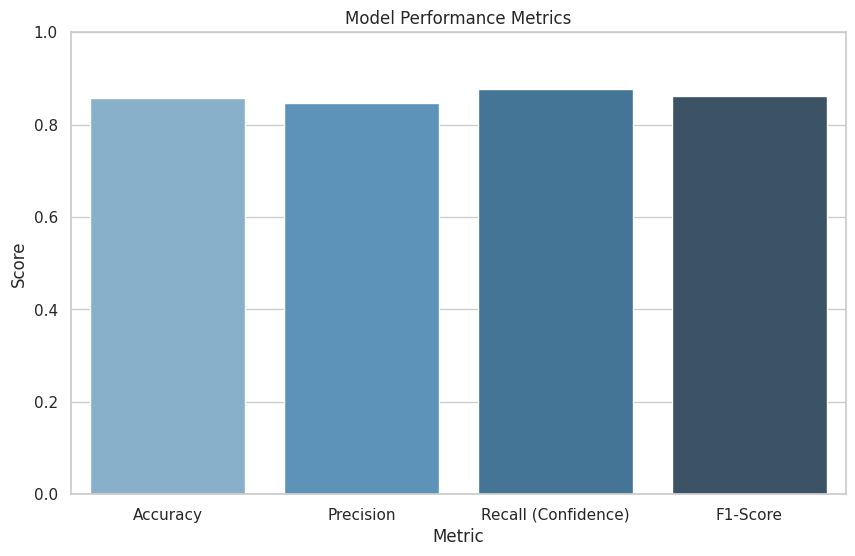

In [9]:
# Menghitung precision, recall, dan F1-score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Plotting grafik akurasi, confidence score (average recall), dan F1-score
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall (Confidence)': recall,
    'F1-Score': f1
}

# Membuat DataFrame dari metrics
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Score'])

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Metric', data=metrics_df, palette="Blues_d", legend=False)
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.show()


In [10]:
# Fungsi untuk prediksi input teks
def predict_sentiment(text):
    text_clean = clean_text(text)
    text_tfidf = tfidf.transform([text_clean]).toarray()
    prediction = model.predict(text_tfidf)
    sentiment = 'Positif' if prediction[0] == 1 else 'Negatif'
    print(f"Teks: {text}")
    print(f"Sentimen: {sentiment}")
    print(f"Akurasi Model: {accuracy:.2f}")

In [11]:
# Antarmuka Input User
while True:
    user_input = input("Masukkan teks untuk analisis sentimen (atau ketik 'exit' untuk keluar): ")
    if user_input.lower() == 'exit':
        print("Program selesai.")
        break
    predict_sentiment(user_input)

Masukkan teks untuk analisis sentimen (atau ketik 'exit' untuk keluar): bagus bat alur ceritanya
Teks: bagus bat alur ceritanya
Sentimen: Positif
Akurasi Model: 0.86
Masukkan teks untuk analisis sentimen (atau ketik 'exit' untuk keluar): memuaskan
Teks: memuaskan
Sentimen: Positif
Akurasi Model: 0.86
Masukkan teks untuk analisis sentimen (atau ketik 'exit' untuk keluar): jelek bat dah ga mutu
Teks: jelek bat dah ga mutu
Sentimen: Negatif
Akurasi Model: 0.86
Masukkan teks untuk analisis sentimen (atau ketik 'exit' untuk keluar): ga rekomend
Teks: ga rekomend
Sentimen: Negatif
Akurasi Model: 0.86
Masukkan teks untuk analisis sentimen (atau ketik 'exit' untuk keluar): exit
Program selesai.
